In [48]:
import numpy as np
# for visualisation
import matplotlib.pyplot as plt
# to load csv data
import pandas as pd

- Load
- Visualize
- Normalize

In [49]:
X = pd.read_csv("./Training Data/Linear_X_Train.csv")
Y = pd.read_csv("./Training Data/Linear_Y_Train.csv")

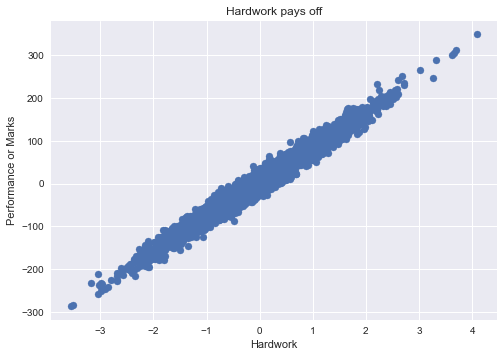

In [50]:
plt.scatter(X, Y)
plt.xlabel("Hardwork")
plt.ylabel("Performance or Marks")
plt.title("Hardwork pays off")
plt.show()

In [51]:
## convert dataframe to numpy array
X = X.values
Y = Y.values

In [52]:
## normalization
u = X.mean()
std = X.std()
X = (X-u)/std

In [53]:
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_

In [54]:
## J(theta)
def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        total_error += (y_ - y)**2
        
    return total_error/m

In [55]:
# delta of J(theta)
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

In [80]:
def gradientDescent(X, Y, learning_rate = 0.1):
    theta = np.zeros((2,))
    max_steps = 100
    error_list = []
    theta_list = []
    for i in range(max_steps):
        grad = gradient(X, Y, theta)
        # theta[0] = theta[0] - learning_rate * grad[0]
        # theta[1] = theta[1] - learning_rate * grad[1]
        
        theta -= learning_rate * grad
        theta_list.append((theta[0], theta[1]))
        
        e = error(X, Y, theta)
        error_list.append(e)
    
    return theta, theta_list, error_list

In [81]:
theta, theta_list, error_list = gradientDescent(X, Y)

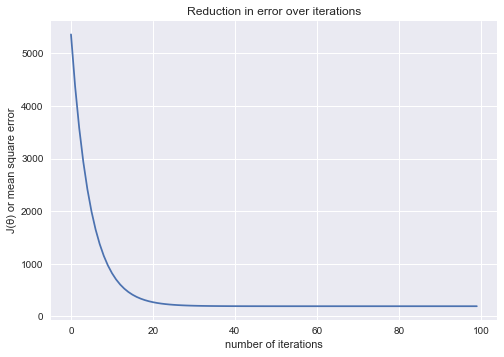

In [18]:
plt.plot(error_list)
plt.title("Reduction in error over iterations")
plt.xlabel("number of iterations")
plt.ylabel("J(θ) or mean square error")
plt.show()

In [83]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [84]:
theta_list = np.array(theta_list)

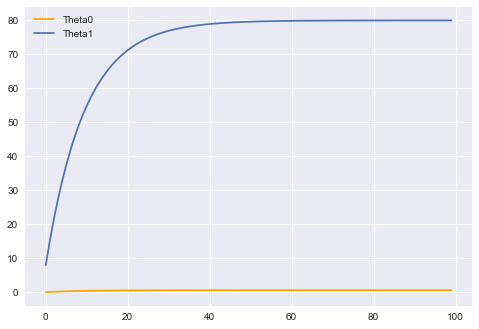

In [86]:
plt.plot(theta_list[:,0], label='Theta0', color ='orange')
plt.plot(theta_list[:,1], label='Theta1')
plt.legend()
plt.show()

In [100]:
# T0, T1 = np.meshgrid(theta_list[:,0], theta_list[:,1])
T0 = np.arange(-40, 40, 1)
T1 = np.arange(40, 120, 1)
T0, T1 = np.meshgrid(T0, T1)

J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        Y_ = T1[i, j]*X + T0[i, j]
        J[i, j] = np.sum((Y_ - Y)**2)/Y.shape[0]

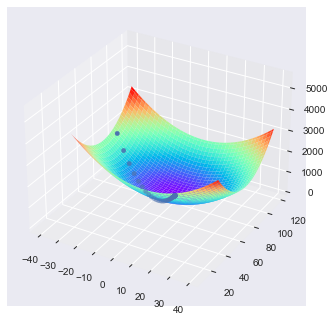

In [107]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(T0, T1, J, cmap = 'rainbow') 
axes.scatter(theta_list[:,0], theta_list[:,1], error_list)
plt.show()

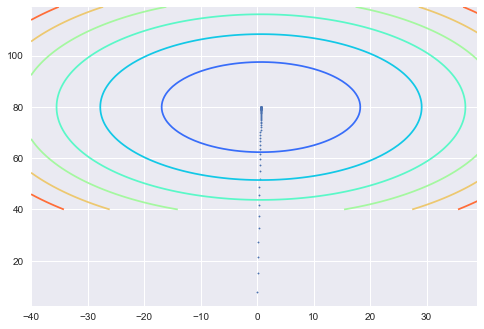

In [112]:
# 2D contour plot i.e., top view of plot
plt.contour(T0, T1, J, cmap = 'rainbow')
plt.scatter(theta_list[:,0], theta_list[:,1], s=2)
plt.show()

TypeError: Input z must be 2D, not 0D

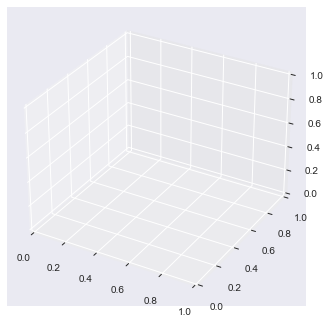

In [46]:
## without functions
t0, t1 = 0, 0
# y = t0 + t1*x[i]
lr = 0.1

theta_list = []
for i in range(100):
    t0 = t0 - lr / X.size * sum(t0 + t1*X - Y)
    t1 = t1 - lr / X.size * sum(X*(t0 + t1*X - Y))
    J = sum(t0 + t1*X - Y) / X.size 
    A, B, C = t0, t1, J
    
    fig = plt.figure()
    axes = fig.gca(projection='3d')
    axes.contour(A, B, C, cmap='coolwarm')  # Plot contour curves

    
plt.show()

In [ ]:
## Predictions

In [19]:
Y_ = hypothesis(X, theta)

In [20]:
Y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

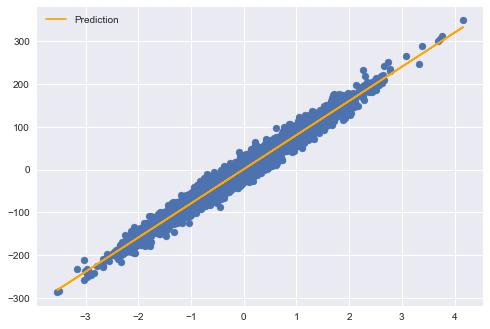

In [21]:
plt.style.use('seaborn')
plt.scatter(X, Y)
plt.plot(X, Y_, color='orange', label = 'Prediction')
plt.legend()
plt.show()

In [30]:
X_test = pd.read_csv("./Test Cases/Linear_X_Test.csv")
Y_test = hypothesis(X_test, theta)

In [31]:
Y_test

,x
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [32]:
X_test = X_test.values
Y_test = Y_test.values

In [33]:
df = pd.DataFrame(data = Y_test, columns = ["y"])

In [34]:
df.to_csv("Y_Predictions.csv", index = False)

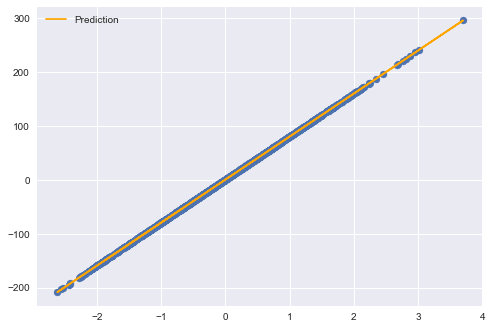

In [35]:
plt.style.use('seaborn')
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test, color='orange', label = 'Prediction')
plt.legend()
plt.show()

# Compute Score
Score: R2 (R-Squared) or Coefficient of Determination

In [39]:
def r2_score(Y, Y_):
    num = np.sum((Y_ - Y)**2)
    denomi = np.sum((Y.mean() - Y)**2)
    
    score = 1 - num/denomi
    
    return score*100

In [42]:
r2_score(Y, Y_)

array([97.09612227])

# Animated plot 

In [118]:
np.save('ThetaList.npy', theta_list)

In [119]:
## see 'Animated Plot.py' file